In [1]:
#trying to read and visualize and esize image datasets...

import numpy as np
import cv2
import matplotlib.pyplot as plt

#using open cv to read images
# just to visualize one image 
img = cv2.imread("Edge Tear/LS3_LPC 13 2019-05-28 11-32-21.330 M1 T7 1 0.bmp", 0)


#display image
plt.imshow(img, cmap = 'gray')
plt.show()

<Figure size 640x480 with 1 Axes>

In [2]:
#checking length
img.shape

(2058, 2456)

In [3]:
#invoking images from folder and reshaping all the images..

import glob
import cv2 as cv

path = glob.glob("Edge Tear/*.bmp")
cv_img_1 = []
for img in path:
    n = cv.imread(img,0) #read gray scale image
    #n = cv.resize(n, (224, 224))
    cv_img_1.append(n)
    

print( cv_img_1[0].shape)

(2058, 2456)


In [4]:

import imutils



cv_img_aug_flip_trans = []

rows, cols = cv_img_1[0].shape

#define all four transformations
M1 = np.float32([[1,0,50],[0,1,50]]) #linear translation... lower right corner
M2 = np.float32([[1,0,-50],[0,1,50]]) #linear translation... lower left corner
M3 = np.float32([[1,0,50],[0,1,-50]]) #linear translation... upper right corner
M4 = np.float32([[1,0,-50],[0,1,-50]]) #linear translation... upper left corner

#start augmentation
for i in range(len(cv_img_1)):
    origin = cv_img_1[i]
    dst_ori_M1 = cv2.warpAffine(origin,M1,(cols,rows)) #applying translation to each images
    dst_ori_M2 = cv2.warpAffine(origin,M2,(cols,rows))
    dst_ori_M3 = cv2.warpAffine(origin,M3,(cols,rows))
    dst_ori_M4 = cv2.warpAffine(origin,M4,(cols,rows))
    
    flip = cv.flip(cv_img_1[i],1)
    dst_flip_M1 = cv2.warpAffine(flip,M1,(cols,rows))
    dst_flip_M2 = cv2.warpAffine(flip,M2,(cols,rows))
    dst_flip_M3 = cv2.warpAffine(flip,M3,(cols,rows))
    dst_flip_M4 = cv2.warpAffine(flip,M4,(cols,rows))
    
    #rotating images for 24 orientations...
    for angle in np.arange(0, 360, 15): 
        rotated  = imutils.rotate(origin, angle)
        rotated1 = imutils.rotate(dst_ori_M1, angle)
        rotated2 = imutils.rotate(dst_ori_M2, angle)
        rotated3 = imutils.rotate(dst_ori_M3, angle)
        rotated4 = imutils.rotate(dst_ori_M4, angle)
        
        rotated_flip = imutils.rotate(flip, angle)
        rotated_flip1 = imutils.rotate(dst_flip_M1, angle)
        rotated_flip2 = imutils.rotate(dst_flip_M2, angle)
        rotated_flip3 = imutils.rotate(dst_flip_M3, angle)
        rotated_flip4 = imutils.rotate(dst_flip_M4, angle)
        
        cv_img_aug_flip_trans.append(rotated)
        cv_img_aug_flip_trans.append(rotated1)
        cv_img_aug_flip_trans.append(rotated2)
        cv_img_aug_flip_trans.append(rotated3)
        cv_img_aug_flip_trans.append(rotated4)
        cv_img_aug_flip_trans.append(rotated_flip)
        cv_img_aug_flip_trans.append(rotated_flip1)
        cv_img_aug_flip_trans.append(rotated_flip2)
        cv_img_aug_flip_trans.append(rotated_flip3)
        cv_img_aug_flip_trans.append(rotated_flip4)

In [5]:
#5 images, each image flipped and translated into 5 variants, 
#each of these images are rotated into 24 different orientations.
    # 5*2*5*24
len(cv_img_aug_flip_trans)

1200

In [6]:
for i in range(len(cv_img_aug_flip_trans)):
    cv.imwrite("New images/img"+str(i)+".bmp",cv_img_aug_flip_trans[i])

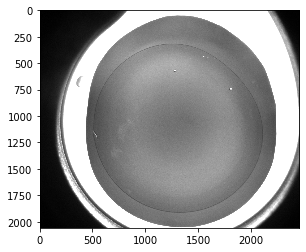

In [24]:
(h, w) = cv_img_1[0].shape[:2]
center = (w / 2, h / 2)
 
# rotate the image by 180 degrees
M = cv2.getRotationMatrix2D(center, 0, 1.15)
rota = cv2.warpAffine(cv_img_1[0], M, (w, h))
plt.imshow(rota, cmap='gray')

In [25]:
cv.imwrite('New images/image.bmp', rota)

True

In [ ]:
#since max zoom allowed is 1.15, for our dataset, it doesn't make any big difference... Hence we skip it...
#Yeahh....!!!

#So, now is the time to make it more tidy

#writing in module wise...



In [32]:
#using list comprehension
#trial
cv_img_1_result = [imutils.rotate(item, angle) for item in cv_img_1 for angle in np.arange(0,360, 20)]

In [33]:
len(cv_img_1_result)

90

In [34]:
flip = [0, 1]

cv_img_1_flip = [cv.flip(item,f) for item in cv_img_1 for f in flip]

print(len(cv_img_1))
print(len(cv_img_1_flip))

5
10


In [36]:
#Linear translation

M0 = np.float32([[1,0,0],[0,1,0]]) #linear translation... lower right corner
M1 = np.float32([[1,0,10],[0,1,10]]) #linear translation... lower right corner
M2 = np.float32([[1,0,-10],[0,1,10]]) #linear translation... lower left corner
M3 = np.float32([[1,0,10],[0,1,-10]]) #linear translation... upper right corner
M4 = np.float32([[1,0,-10],[0,1,-10]]) #linear translation... upper left corner

M = [M0, M1, M2, M3, M4]

#now its translation...!!!
rows, cols = cv_img_1[0].shape
cv_img_1_flip_trans = [cv2.warpAffine(item, m, (cols, rows)) for item in cv_img_1_flip for m in M]

print(len(cv_img_1_flip_trans))

50


In [37]:
#now comes rotation
cv_img_1_flip_trans_rotate = [imutils.rotate(item, angle) for item in cv_img_1_flip_trans 
                              for angle in np.arange(0,360, 15)]
print(len(cv_img_1_flip_trans_rotate))

1200


In [38]:
def Aug_list_comprehension(input_list):
    
    cv_img = input_list
    
    flip = [0, 1]
    
    #Linear translation

    M0 = np.float32([[1,0,0],[0,1,0]]) #linear translation... lower right corner
    M1 = np.float32([[1,0,10],[0,1,10]]) #linear translation... lower right corner
    M2 = np.float32([[1,0,-10],[0,1,10]]) #linear translation... lower left corner
    M3 = np.float32([[1,0,10],[0,1,-10]]) #linear translation... upper right corner
    M4 = np.float32([[1,0,-10],[0,1,-10]]) #linear translation... upper left corner

    M = [M0, M1, M2, M3, M4]
    
    rows, cols = cv_img[0].shape

    
    cv_img_flip = [cv.flip(item,f) for item in cv_img for f in flip]
    
    cv_img_flip_trans = [cv2.warpAffine(item, m, (cols, rows)) for item in cv_img_flip for m in M]
    
    cv_img_flip_trans_rotate = [imutils.rotate(item, angle) for item in cv_img_flip_trans 
                              for angle in np.arange(0,360, 15)]
    
    return cv_img_flip_trans_rotate

In [39]:
def Aug_for_loops(input_list):
    
    cv_img_1 = input_list
    
    cv_img_aug_flip_trans = []

    rows, cols = cv_img_1[0].shape

    #define all four transformations
    M1 = np.float32([[1,0,50],[0,1,50]]) #linear translation... lower right corner
    M2 = np.float32([[1,0,-50],[0,1,50]]) #linear translation... lower left corner
    M3 = np.float32([[1,0,50],[0,1,-50]]) #linear translation... upper right corner
    M4 = np.float32([[1,0,-50],[0,1,-50]]) #linear translation... upper left corner

    #start augmentation
    for i in range(len(cv_img_1)):
        origin = cv_img_1[i]
        dst_ori_M1 = cv2.warpAffine(origin,M1,(cols,rows)) #applying translation to each images
        dst_ori_M2 = cv2.warpAffine(origin,M2,(cols,rows))
        dst_ori_M3 = cv2.warpAffine(origin,M3,(cols,rows))
        dst_ori_M4 = cv2.warpAffine(origin,M4,(cols,rows))

        flip = cv.flip(cv_img_1[i],1)
        dst_flip_M1 = cv2.warpAffine(flip,M1,(cols,rows))
        dst_flip_M2 = cv2.warpAffine(flip,M2,(cols,rows))
        dst_flip_M3 = cv2.warpAffine(flip,M3,(cols,rows))
        dst_flip_M4 = cv2.warpAffine(flip,M4,(cols,rows))

        #rotating images for 24 orientations...
        for angle in np.arange(0, 360, 15): 
            rotated  = imutils.rotate(origin, angle)
            rotated1 = imutils.rotate(dst_ori_M1, angle)
            rotated2 = imutils.rotate(dst_ori_M2, angle)
            rotated3 = imutils.rotate(dst_ori_M3, angle)
            rotated4 = imutils.rotate(dst_ori_M4, angle)

            rotated_flip = imutils.rotate(flip, angle)
            rotated_flip1 = imutils.rotate(dst_flip_M1, angle)
            rotated_flip2 = imutils.rotate(dst_flip_M2, angle)
            rotated_flip3 = imutils.rotate(dst_flip_M3, angle)
            rotated_flip4 = imutils.rotate(dst_flip_M4, angle)

            cv_img_aug_flip_trans.append(rotated)
            cv_img_aug_flip_trans.append(rotated1)
            cv_img_aug_flip_trans.append(rotated2)
            cv_img_aug_flip_trans.append(rotated3)
            cv_img_aug_flip_trans.append(rotated4)
            cv_img_aug_flip_trans.append(rotated_flip)
            cv_img_aug_flip_trans.append(rotated_flip1)
            cv_img_aug_flip_trans.append(rotated_flip2)
            cv_img_aug_flip_trans.append(rotated_flip3)
            cv_img_aug_flip_trans.append(rotated_flip4)
            
    return cv_img_aug_flip_trans

In [40]:
import time

start = time.time()
cv_aug_for_loop = Aug_for_loops(cv_img_1)
time_taken_for_loop = time.time()-start

start = time.time()
cv_aug_list_compre = Aug_list_comprehension(cv_img_1)
time_taken_list_comp = time.time()-start

print("for loop time: {}".format(time_taken_for_loop))
print("list compre time: {}".format(time_taken_list_comp))

error: OpenCV(4.1.0) C:\projects\opencv-python\opencv\modules\core\src\alloc.cpp:55: error: (-4:Insufficient memory) Failed to allocate 5054448 bytes in function 'cv::OutOfMemoryError'
